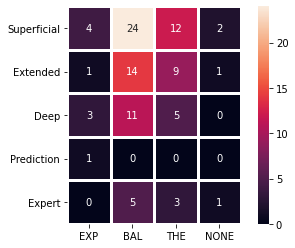

In [1]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer

In [2]:
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

In [3]:
# import the yr1c1c1 labels
dir_csv = 'outputs/labels_cleaned_y1c1c2.csv'
df = pd.read_csv(dir_csv, encoding='utf-8')

In [4]:
# -- Bag of Words ---
wordvec_names, wordvec_counts= ml_tools.BoW(df['Content'].tolist())
y_b = df['ReasoningLevel'].tolist()

# -- Feature extraction: TF-IDF ---
X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()))
X_t = X_t[1]
y_t = df['ReasoningLevel'].tolist()

<ipython-input-4-d71189f87b28>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()))


In [5]:
# BOW
# coding the labels so easily interpretable by the computer
lb = LabelBinarizer()
lb.fit(y_b)
y_b = lb.transform(y_b)

# TF-IDF
# --- one hot encoding - using labelbinarrizer as it does not require labels to be integers
lb = LabelBinarizer()
lb.fit(y_t)
y_t = lb.transform(y_t)


In [ ]:
# code reference
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [9]:
# prepare for LDA analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EfiaA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df['Content'].tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['atom', 'atomic', 'number', 'vacuum', 'permittivity', 'electron', 'mass', 'charge', 'electron', 'divide', 'eq', 'eq', 'potential', 'kinetic', 'energy', 'electron', 'respectively', 'since', 'energy', 'photon', 'emit', 'hydrogen', 'atom', 'give', 'difference', 'two', 'hydrogen', 'energy', 'level', 'positive']


In [11]:
#create 

id2word = corpora.Dictionary(data_words)

#create corpus
texts = data_words

#Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

#View 
print(corpus[:1][0][:30])

[(0, 2), (1, 3), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 4), (8, 1), (9, 4), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 2), (24, 2), (25, 1), (26, 7), (27, 8), (28, 1), (29, 1)]


In [12]:
#LDA model training 
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"line" + 0.017*"wavelength" + 0.017*"rydberg" + 0.016*"error" + '
  '0.014*"constant" + 0.013*"energy" + 0.012*"grate" + 0.011*"light" + '
  '0.011*"measure" + 0.011*"order"'),
 (1,
  '0.020*"value" + 0.013*"line" + 0.013*"wavelength" + 0.012*"constant" + '
  '0.011*"rydberg" + 0.010*"light" + 0.010*"energy" + 0.009*"grate" + '
  '0.009*"order" + 0.009*"electron"'),
 (2,
  '0.023*"constant" + 0.022*"wavelength" + 0.019*"line" + 0.017*"grate" + '
  '0.015*"error" + 0.014*"rydberg" + 0.014*"energy" + 0.013*"hydrogen" + '
  '0.012*"value" + 0.012*"angle"'),
 (3,
  '0.024*"value" + 0.023*"light" + 0.019*"grate" + 0.019*"constant" + '
  '0.015*"rydberg" + 0.014*"line" + 0.014*"wavelength" + 0.012*"energy" + '
  '0.012*"hydrogen" + 0.012*"calculate"'),
 (4,
  '0.022*"value" + 0.020*"light" + 0.017*"error" + 0.016*"line" + '
  '0.012*"order" + 0.012*"rydberg" + 0.011*"energy" + 0.011*"wavelength" + '
  '0.011*"grate" + 0.011*"experiment"'),
 (5,
  '0.023*"value" + 0.018*"light" 

In [21]:
%pip install pyLDAvis==2.1.2
import pickle 
import pyLDAvis
from pyLDAvis import gensim
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(dir_name_e+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, dir_name_e + str(num_topics) +'.html')
LDAvis_prepared

c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.009654 -0.003935       1        1  55.669037
3      0.005949  0.002138       2        1  13.699452
8      0.002953 -0.001526       3        1   9.625373
6      0.001614  0.001172       4        1   7.668839
4      0.000192  0.006391       5        1   6.714084
5      0.001687  0.004954       6        1   2.428009
0      0.002537 -0.003985       7        1   2.259616
7     -0.002309  0.000979       8        1   1.786153
9     -0.004826 -0.006122       9        1   0.138736
1     -0.017451 -0.000065      10        1   0.010701, topic_info=           Term         Freq        Total Category  logprob  loglift
164  wavelength  1721.000000  1721.000000  Default  30.0000  30.0000
159       value  1448.000000  1448.000000  Default  29.0000  29.0000
89         line  1630.000000  1630.000000  Default  28.0000  28.0000
26     constant  1685.000000  1685.000000  Default  27.0000  27.0000
69        grate  1435.000000  1435.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
402       would     0.043756   509.320324  Topic10  -5.3803  -0.2196
570    spectral     0.043726   668.602122  Topic10  -5.3810  -0.4924
241    equation     0.042126   622.142807  Topic10  -5.4183  -0.4576
9          atom     0.040676   446.892607  Topic10  -5.4533  -0.1618
85         lamp     0.041494   758.266029  Topic10  -5.4334  -0.6706

[842 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
168       1  0.467876  able
168       2  0.159078  able
168       3  0.084218  able
168       4  0.112290  able
168       5  0.112290  able
...     ...       ...   ...
2205      1  0.536355   𝑠𝑖𝑛
2205      2  0.134089   𝑠𝑖𝑛
2205      3  0.134089   𝑠𝑖𝑛
2205      4  0.134089   𝑠𝑖𝑛
2017      1  0.852399    𝜆n

[1681 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 9, 7, 5, 6, 1, 8, 10, 2])